<a href="https://colab.research.google.com/github/mehrnazeraeisi/California_Housing/blob/main/Best_Method_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Regression Analysis on Diabetes Dataset:
{'First Method': {'R² Score': 0.1724878302420758, 'MSE': 4243.422022471909}, 'Second Method': {'R² Score': 0.20298923449055373, 'MSE': 4087.0130471910115}}


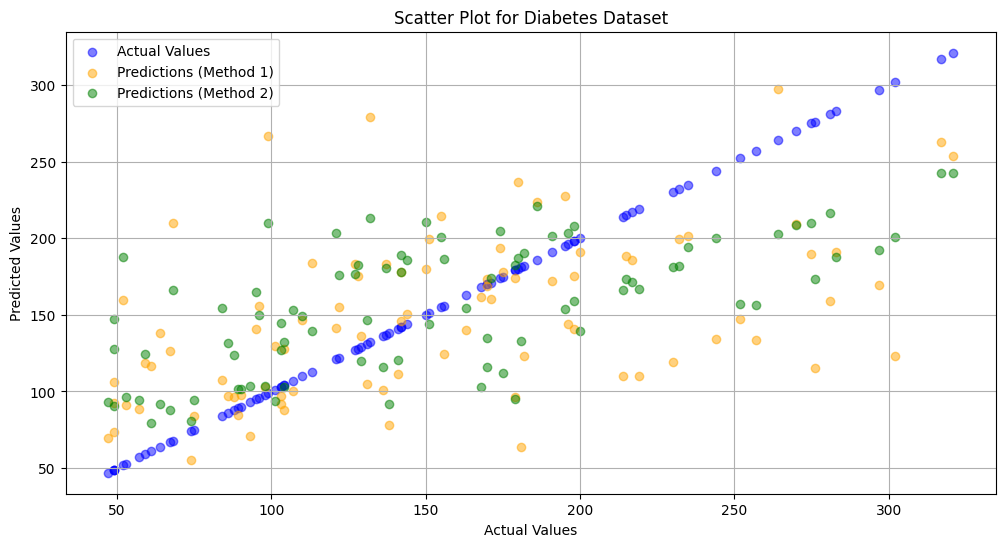


KNN Regression Analysis on California Housing Dataset:
{'First Method': {'R² Score': 0.14312051440566032, 'MSE': 1.1173322059337034}, 'Second Method': {'R² Score': 0.2808603215330643, 'MSE': 0.9377257091860332}}


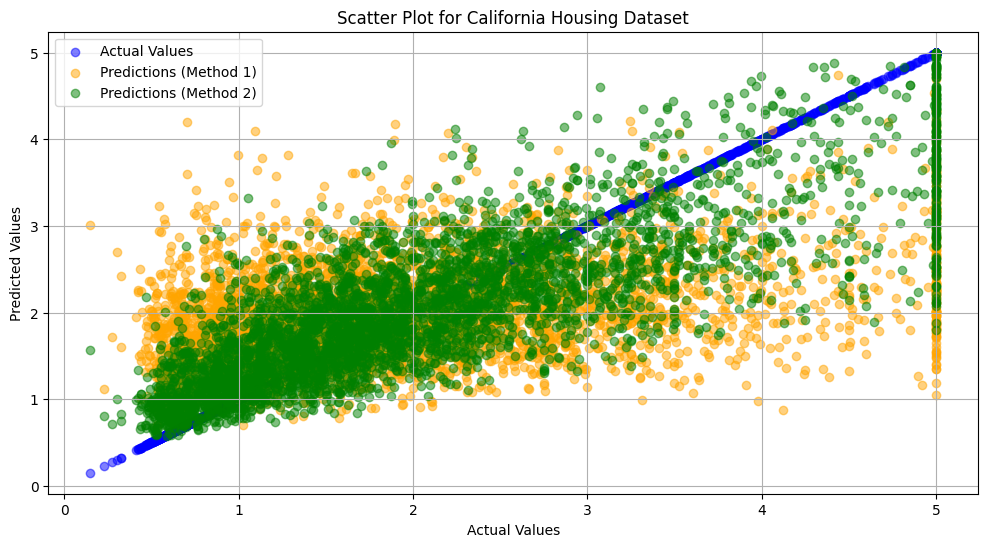

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets

k = 5

def knn_regression_analysis(X, y, test_size=0.2, n_neighbors=k):
    """
    Perform KNN regression analysis on the given dataset.

    Parameters:
    - X: DataFrame or array of features
    - y: Target variable
    - test_size: Proportion of data for test set
    - n_neighbors: Number of neighbors for KNN

    Returns:
    - results: A dictionary containing R² Score and MSE for both methods
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    results = {}

    # Method 1: KNN regression on the whole dataset
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    results['First Method'] = {
        'R² Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }

    # Method 2: KNN regression on each feature separately
    predictions = np.zeros((X.shape[1], y_test.size))
    for i in range(X.shape[1]):
        knn_single = KNeighborsRegressor(n_neighbors=n_neighbors)
        knn_single.fit(X_train.iloc[:, [i]], y_train)
        predictions[i, :] = knn_single.predict(X_test.iloc[:, [i]])


    final_y_pred = predictions.mean(axis=0)  # میانگین روی سطرها → پیش‌بینی برای هر نمونه
    results['Second Method'] = {
        'R² Score': r2_score(y_test, final_y_pred),
        'MSE': mean_squared_error(y_test, final_y_pred)
    }

    return results

def plot_knn_results(X, y, results, dataset_name):
    """
    Plot scatter graphs for actual vs. predicted values.

    Parameters:
    - X: Feature DataFrame
    - y: Target variable
    - results: Dictionary containing results for both methods
    - dataset_name: Name of the dataset for title
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_first = knn.predict(X_test)

    predictions = np.zeros((X.shape[1], y_test.size))
    for i in range(X.shape[1]):
        knn_single = KNeighborsRegressor(n_neighbors=k)
        knn_single.fit(X_train.iloc[:, [i]], y_train)
        predictions[i, :] = knn_single.predict(X_test.iloc[:, [i]])

    final_knn = KNeighborsRegressor(n_neighbors=k)
    final_knn.fit(predictions.T, y_test)
    y_pred_second = final_knn.predict(predictions.T)

    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_test, color='blue', label='Actual Values', alpha=0.5)
    plt.scatter(y_test, y_pred_first, color='orange', label='Predictions (Method 1)', alpha=0.5)
    plt.scatter(y_test, y_pred_second, color='green', label='Predictions (Method 2)', alpha=0.5)

    plt.title(f'Scatter Plot for {dataset_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid()
    plt.show()

# Load and analyze the Diabetes dataset
diabetes = datasets.load_diabetes()
X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_diabetes = diabetes.target

results_diabetes = knn_regression_analysis(X_diabetes, y_diabetes)
print("KNN Regression Analysis on Diabetes Dataset:")
print(results_diabetes)
plot_knn_results(X_diabetes, y_diabetes, results_diabetes, "Diabetes Dataset")

# Load and analyze the California Housing dataset
california_housing = datasets.fetch_california_housing()
X_california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y_california = california_housing.target

results_california = knn_regression_analysis(X_california, y_california)
print("\nKNN Regression Analysis on California Housing Dataset:")
print(results_california)
plot_knn_results(X_california, y_california, results_california, "California Housing Dataset")

